In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [9]:
experiment = "01_Multiplication" # 506
# experiment = "02_Compare" # 507|508|509
# experiment = "03_Share"
experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

data=[]
framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]

base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [10]:
import pandas as pd


In [11]:
# fl_paths[-1].split("/")[-2]

In [12]:
# runtime/3600

bandwidths(Mbs)
100      0.18
1000     3.00
10000    2.92
25000    4.64
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.14
1000     3.01
10000    3.10
25000    2.92
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.19
1000     2.87
10000    3.01
25000    3.13
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      167.49
1000     167.27
10000    166.57
25000    166.88
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      166.34
1000     160.54
10000    164.68
25000    165.19
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      166.30
1000     164.27
10000    163.99
25000    164.13
Name: runtime_external(s), dtype: float64
300
bandwidths(Mbs)
100      8.39
1000     4.70
10000    4.42
25000    4.39
Name: runtime_external(s), dtype: float64
300
bandwidths(Mbs)
100      111.53
1000      37.37
10000     30.39
25000     31.31
Name: runtime_external(s), dtype: float64
[                  mean       std  bandwidths(Mb

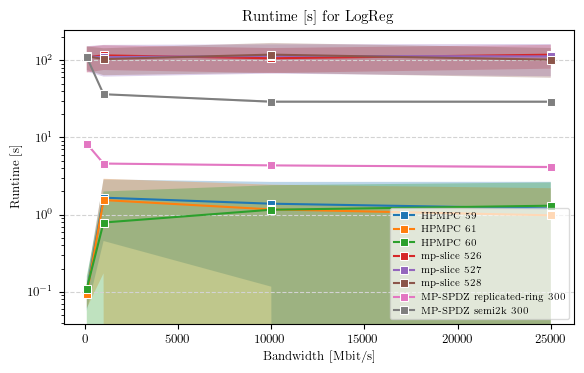

In [13]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

print(bandwidth)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

Series([], Name: runtime_external(s), dtype: float64)
latencies(ms)
0      4.64
25    15.22
50    30.30
75    45.36
Name: runtime_external(s), dtype: float64
Series([], Name: runtime_external(s), dtype: float64)
latencies(ms)
0      2.92
25    15.21
50    30.29
75    45.36
Name: runtime_external(s), dtype: float64
Series([], Name: runtime_external(s), dtype: float64)
latencies(ms)
0      3.13
25    15.22
50    30.28
75    45.37
Name: runtime_external(s), dtype: float64
latencies(ms)
0    166.88
Name: runtime_external(s), dtype: float64
latencies(ms)
0    165.19
Name: runtime_external(s), dtype: float64
latencies(ms)
0    164.13
Name: runtime_external(s), dtype: float64
300
latencies(ms)
0       8.39
25    268.04
50    529.82
75    791.56
Name: runtime_external(s), dtype: float64
300
latencies(ms)
0     111.53
25    112.16
50    218.34
75    329.91
Name: runtime_external(s), dtype: float64


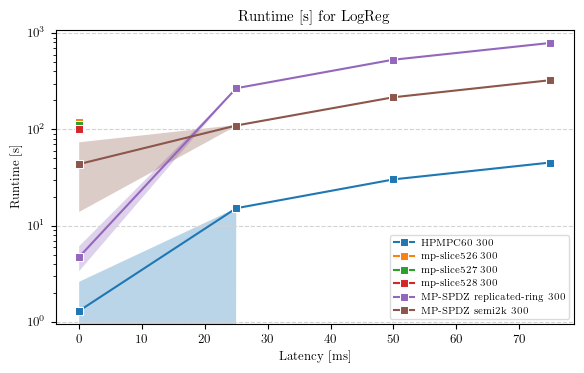

In [14]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del latency[-1]
# del label[-2]
# del latency[-2]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

del latency[-7] # LogReg
del latency[-7]
del latency[-7]
del latency[-7]
del latency[-7]
del label[-7]
del label[-7]
del label[-7]
del label[-7]
del label[-7]
# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_125210/2844482687.py:28: SyntaxWarning: invalid escape sequence '\%'
  rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\%]","Runtime [s]",True)


packetdrops(%)
0.0     4.64
1.0     4.24
2.0     6.80
5.0    15.22
Name: runtime_external(s), dtype: float64
packetdrops(%)
0.0     3.10
1.0     6.13
2.0     9.10
5.0    16.40
Name: runtime_external(s), dtype: float64
packetdrops(%)
0.0     3.13
1.0     4.21
2.0     6.75
5.0    36.99
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    167.49
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    166.34
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    166.3
Name: runtime_external(s), dtype: float64
packetdrops(%)
0      4.39
1     99.17
2    154.37
5    349.81
Name: runtime_external(s), dtype: float64
packetdrops(%)
0     31.31
1     42.51
2     52.85
5    113.75
Name: runtime_external(s), dtype: float64


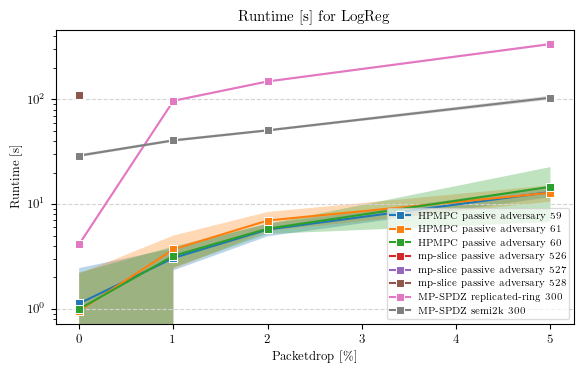

In [15]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[0] # AUCTION
# del packetdrop[1]
# del packetdrop[2]
# del packetdrop[-2]
# del packetdrop[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del packetdrop[-1]
# del label[-2]
# del packetdrop[-2]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]
# print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\%]","Runtime [s]",True)

In [16]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # Division
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]
[df['mean'].iloc[0] for df in bandwidth]

bandwidths(Mbs)
100      0.18
1000     3.00
10000    2.92
25000    4.64
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.14
1000     3.01
10000    3.10
25000    2.92
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.19
1000     2.87
10000    3.01
25000    3.13
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      167.49
1000     167.27
10000    166.57
25000    166.88
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      166.34
1000     160.54
10000    164.68
25000    165.19
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      166.30
1000     164.27
10000    163.99
25000    164.13
Name: runtime_external(s), dtype: float64
300
bandwidths(Mbs)
100      8.39
1000     4.70
10000    4.42
25000    4.39
Name: runtime_external(s), dtype: float64
300
bandwidths(Mbs)
100      111.53
1000      37.37
10000     30.39
25000     31.31
Name: runtime_external(s), dtype: float64


[0.1,
 0.094,
 0.11000000000000001,
 109.774,
 111.768,
 112.92699999999999,
 8.294,
 109.44200000000001]

In [17]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.04320493798938573,
 0.03238655413730965,
 0.050332229568471665,
 40.34707925543613,
 40.422055255900965,
 38.47829028599547,
 0.08324662155307035,
 0.9454311185908816]

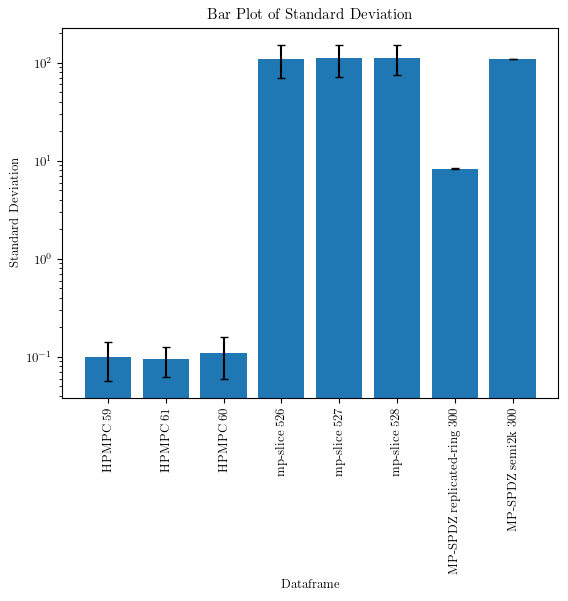

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Example data
# fig, ax = plt.subplots()
# deviation61 = data[0].loc[(data[0]['function'] == 507) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation62 = data[0].loc[(data[0]['function'] == 508)  & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation63 = data[0].loc[(data[0]['function'] == 509) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# 
# # Plot the first violin plot
# two_dimensional_list = [deviation61, deviation62, deviation63]
# ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# # Set the x-tick labels
# ax.set_xticks([1, 2, 3])
# ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])
# 
# 
# # Set plot title and labels
# plt.title("Devation of runtime for HP-MPC Logistic Regression")
# plt.xlabel("Comparison Type")
# plt.ylabel("Runtime [s]")
# ax.figure.set_size_inches(5.91, 2.8)
# fig.tight_layout()
# plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
# plt.show()